<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns

In [2]:
cd ..

/home/eacardenase/Documents/Especializacion en Analitica Estrategica de Datos/2nd semester/Natural Language Processing


In [3]:
cd Archivos\ taller\ 7-20210421

/home/eacardenase/Documents/Especializacion en Analitica Estrategica de Datos/2nd semester/Natural Language Processing/Archivos taller 7-20210421


In [4]:
# Cargar datos
data = pd.read_csv("reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [5]:
train, test = train_test_split(data, test_size=0.2, random_state=20)

###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [6]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+"," ", texto)
    texto = texto.split()
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

vectorizer = TfidfVectorizer(preprocessor=pre_procesado)

In [7]:
x_train = vectorizer.fit_transform(train.review_body.values)
y_train = train.product_category.values

x_test = vectorizer.transform(test.review_body.values)
y_test = test.product_category.values

###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [8]:
svm = LinearSVC(class_weight='balanced')
svm.fit(x_train, y_train);

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [9]:
y_pred_svm = svm.predict(x_test)
print(f"Exactitud del modelo SVM: {accuracy_score(y_test, y_pred_svm):>.2f}")

Exactitud del modelo SVM: 0.83


In [10]:
print("\t\t\t\tSVM\n")
print(classification_report(y_test, y_pred_svm))

				SVM

              precision    recall  f1-score   support

     jewelry       0.84      0.84      0.84       104
 video_games       0.82      0.83      0.83        96

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



###  `[BONUS: 3 pts]` Matriz de confusión

In [11]:
confusion_matrix(y_test, y_pred_svm)

array([[87, 17],
       [16, 80]])

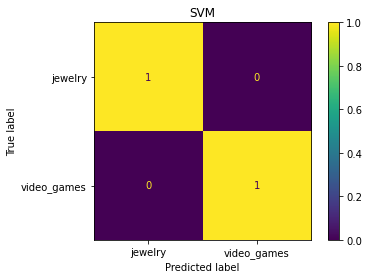

In [12]:
plot_confusion_matrix(svm, x_test, y_pred_svm, normalize="true")
plt.title("SVM");

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [13]:
vocab = {value:key for key,value in vectorizer.vocabulary_.items()}
vocab

{3204: 'útil',
 1798: 'manejable',
 1870: 'micro',
 268: 'baja',
 382: 'calidad',
 814: 'demás',
 911: 'dicen',
 1145: 'escucha',
 2698: 'ruidos',
 300: 'bien',
 245: 'auriculares',
 2144: 'pasa',
 603: 'conectado',
 2004: 'ningún',
 3116: 'ventilador',
 2129: 'parecido',
 1720: 'llegado',
 2444: 'pulsera',
 380: 'cajas',
 2686: 'rotas',
 1984: 'necesitaba',
 2599: 'regalo',
 636: 'contenta',
 2726: 'saludo',
 1439: 'gusta',
 942: 'diseño',
 320: 'bonito',
 37: 'acerté',
 2566: 'recomiendo',
 2467: 'queda',
 485: 'chulo',
 2909: 'tamaño',
 526: 'colgante',
 1661: 'justo',
 2717: 'sale',
 1327: 'foto',
 3141: 'viene',
 371: 'cadena',
 2345: 'precio',
 1823: 'mas',
 2197: 'pequeños',
 1522: 'imaginaba',
 321: 'bonitos',
 550: 'comodos',
 488: 'cierre',
 565: 'complicado',
 2125: 'parece',
 2747: 'seguro',
 2196: 'pequeño',
 1166: 'esperaba',
 1731: 'llegó',
 817: 'dentro',
 2281: 'plazo',
 2469: 'quedan',
 233: 'atascados',
 2718: 'salen',
 0: 'abajo',
 2233: 'personalmente',
 2179: 'pen

In [17]:
print("Las palabras que más aportan a la clase 0 'Joyeria' son:")
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][:10]

Las palabras que más aportan a la clase 0 'Joyeria' son:


[('pulsera', -1.75),
 ('calidad', -1.65),
 ('bonitos', -1.48),
 ('foto', -1.37),
 ('bonito', -1.34),
 ('bonita', -1.31),
 ('plata', -1.23),
 ('pendientes', -1.21),
 ('cadena', -1.17),
 ('gracias', -1.12)]

In [16]:
print("Las palabras que más aportan a la clase 1 'Videojuego' son:")
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][-10:]

Las palabras que más aportan a la clase 1 'Videojuego' son:


[('descripción', 1.06),
 ('perfecto', 1.06),
 ('sonido', 1.14),
 ('ratón', 1.14),
 ('hijo', 1.16),
 ('botones', 1.23),
 ('funciona', 1.26),
 ('ps', 1.4),
 ('mando', 1.85),
 ('juego', 2.47)]

In [20]:
nuevas_palabras = ['plata, pulsera, grandes']
nuevos_trans = vectorizer.transform(nuevas_palabras)
svm.predict(nuevos_trans)

array(['jewelry'], dtype=object)

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?